In [1]:
from utils import combine_and_aggregate_sample_PTM_in_dataframe, get_data_and_remove_unwanted_columns, sanitize_data, count_no_of_modifications, split_data_in_samples
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
df1, df2, df3, df4 = split_data_in_samples(df)
df1['#modifications1'] = df1['PTM'].apply(count_no_of_modifications)
df2['#modifications2'] = df2['PTM'].apply(count_no_of_modifications)
df3['#modifications3'] = df3['PTM'].apply(count_no_of_modifications)
df4['#modifications4'] = df4['PTM'].apply(count_no_of_modifications)

Index(['Protein Group', 'Protein Accession', 'Peptide', '-10lgP', 'Mass',
       'Length', 'ppm', 'z', 'RT', 'Area Sample 1', 'Area Sample 2',
       'Area Sample 3', 'Area Sample 4', 'Fraction', '#Feature',
       '#Feature Sample 1', '#Feature Sample 2', '#Feature Sample 3',
       '#Feature Sample 4', 'Start', 'End', 'PTM', 'AScore', '#modifications'],
      dtype='object')


Text(0, 0.5, 'Count/size')

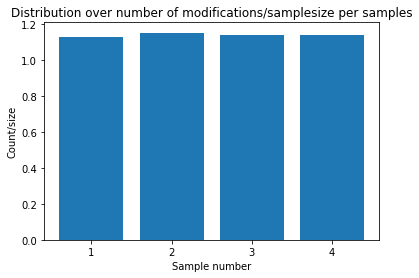

In [2]:
# plt.figure(figsize=(16,8))
samples = [1,2,3,4]

sums = [df1['#modifications1'].sum(axis = 0) / df1.shape[0], 
        df2['#modifications2'].sum(axis = 0) / df2.shape[0], 
        df3['#modifications3'].sum(axis = 0) / df3.shape[0], 
        df4['#modifications4'].sum(axis = 0) / df4.shape[0]]

plt.bar(samples, sums)
plt.xticks(samples)
plt.title("Distribution over number of modifications/samplesize per samples")
plt.xlabel('Sample number')
plt.ylabel('Count/size')

#Shit plot

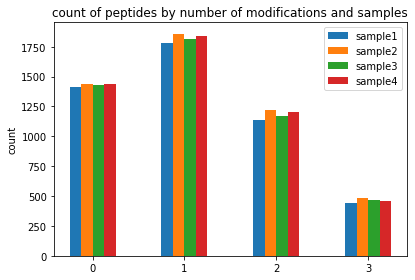

In [3]:
x = np.arange(4)
labels = ['sample1', 'sample2', 'sample3', 'sample4']
width = 0.125

fig, ax = plt.subplots()
rects1 = ax.bar(x-width*3/2, df1['#modifications1'].value_counts(sort=False), width, label="sample1")
rects2 = ax.bar(x-width/2, df2['#modifications2'].value_counts(sort=False), width, label="sample2")
rects3 = ax.bar(x+width/2, df3['#modifications3'].value_counts(sort=False), width, label="sample3")
rects4 = ax.bar(x+width*3/2, df4['#modifications4'].value_counts(sort=False), width, label="sample4")

ax.set_ylabel('count')
ax.set_title("count of peptides by number of modifications and samples")
ax.set_xticks(x)
ax.set_xticklabels(x)

ax.legend()

fig.tight_layout()

plt.show()

#More shit plots

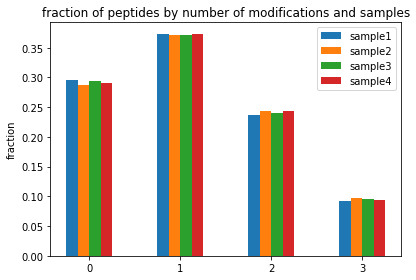

In [4]:
x = np.arange(4)
labels = ['sample1', 'sample2', 'sample3', 'sample4']
width = 0.125

fig, ax = plt.subplots()
rects1 = ax.bar(x-width*3/2, df1['#modifications1'].value_counts(sort=False, normalize=True), width, label="sample1")
rects2 = ax.bar(x-width/2, df2['#modifications2'].value_counts(sort=False, normalize=True), width, label="sample2")
rects3 = ax.bar(x+width/2, df3['#modifications3'].value_counts(sort=False, normalize=True), width, label="sample3")
rects4 = ax.bar(x+width*3/2, df4['#modifications4'].value_counts(sort=False, normalize=True), width, label="sample4")

ax.set_ylabel('fraction')
ax.set_title("fraction of peptides by number of modifications and samples")
ax.set_xticks(x)
ax.set_xticklabels(x)

ax.legend()

fig.tight_layout()

plt.show()

#Even More shit plots

                       PTM  #PTM  Sample
0         Deamidation (NQ)  1126       1
1    Phosphorylation (STY)   588       1
2     Carbamidomethylation   469       1
3            Lactosylation   324       1
4                      lal   274       1
5            Oxidation (M)   185       1
6          Pyro-glu from Q   126       1
7     Glycosylation type a    94       1
8                      lan    51       1
9          Dioxidation (M)    41       1
10    Glycosylation type b    39       1
11    Glycosylation type e    26       1
12  Glycosylation type c/d    18       1
0         Deamidation (NQ)  1169       2
1    Phosphorylation (STY)   634       2
2     Carbamidomethylation   490       2
3            Lactosylation   347       2
4                      lal   297       2
5            Oxidation (M)   201       2
6          Pyro-glu from Q   131       2
7     Glycosylation type a   101       2
8                      lan    52       2
9          Dioxidation (M)    46       2
10    Glycosylat

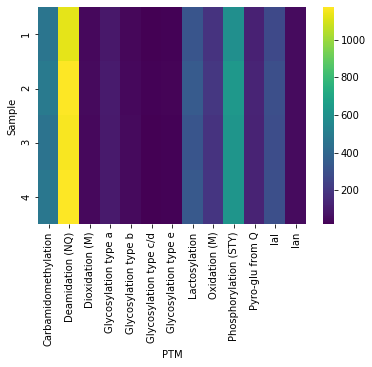

In [7]:
combined = combine_and_aggregate_sample_PTM_in_dataframe(df1,df2,df3,df4)
print(combined)
data = pd.pivot_table(data = combined, index = 'Sample', values = '#PTM', columns='PTM')
data.head()
sns.heatmap(data, cmap='viridis')

#Last shitplots